In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("spotify_dataset.csv")
print(df.head())
print(df.tail())
print(df.shape)

   Index  Highest Charting Position  Number of Times Charted  \
0      1                          1                        8   
1      2                          2                        3   
2      3                          1                       11   
3      4                          3                        5   
4      5                          5                        1   

  Week of Highest Charting                          Song Name     Streams  \
0   2021-07-23--2021-07-30                            Beggin'  48,633,449   
1   2021-07-23--2021-07-30          STAY (with Justin Bieber)  47,248,719   
2   2021-06-25--2021-07-02                           good 4 u  40,162,559   
3   2021-07-02--2021-07-09                         Bad Habits  37,799,456   
4   2021-07-23--2021-07-30  INDUSTRY BABY (feat. Jack Harlow)  33,948,454   

           Artist Artist Followers                 Song ID  \
0        Måneskin          3377762  3Wrjm47oTz2sjIgck11l5e   
1   The Kid LAROI          2

In [3]:
df.replace(' ', np.nan, inplace=True)
df.dropna(inplace=True)
print(df.shape)

(1545, 23)


In [4]:
df['Loudness'] = df['Loudness'].astype(float)
column='Loudness'
df['Normalized_loud'] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
print(df['Normalized_loud'])

0       0.763187
1       0.737844
2       0.754339
3       0.804274
4       0.665679
          ...   
1551    0.717713
1552    0.826354
1553    0.780993
1554    0.680037
1555    0.674414
Name: Normalized_loud, Length: 1545, dtype: float64


In [5]:
df.to_csv('new_spotify')

[ 1. 12.] 1 142


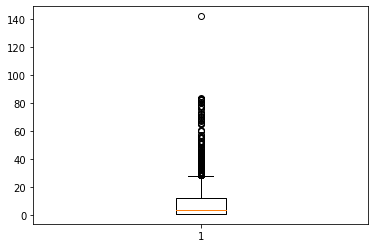

In [6]:
import matplotlib.pyplot as plt
from numpy import percentile
temp = df['Number of Times Charted']
plt.boxplot(temp)
quartiles = percentile(temp, [25, 75])
data_min, data_max = temp.min(), temp.max()
print(quartiles, data_min, data_max)

# We can see that the data is heavily skewed. Since there are so many low values
# the higher values seem like a lot of outliers

[ 37. 137.]
1 200


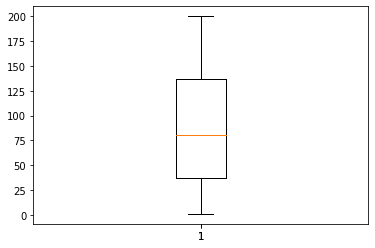

In [7]:
plt.boxplot(df['Highest Charting Position'])
temp = df['Highest Charting Position']
plt.boxplot(temp)
quartiles = percentile(temp, [25, 75])
data_min, data_max = temp.min(), temp.max()
print(quartiles)
print(data_min, data_max)

# very well balanced

{'whiskers': [<matplotlib.lines.Line2D at 0x18836d70310>,
 'caps': [<matplotlib.lines.Line2D at 0x18836d70a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x18836d5ef40>,
 'medians': [<matplotlib.lines.Line2D at 0x18836d7e190>,
 'fliers': [<matplotlib.lines.Line2D at 0x18836d7e520>,
 'means': []}

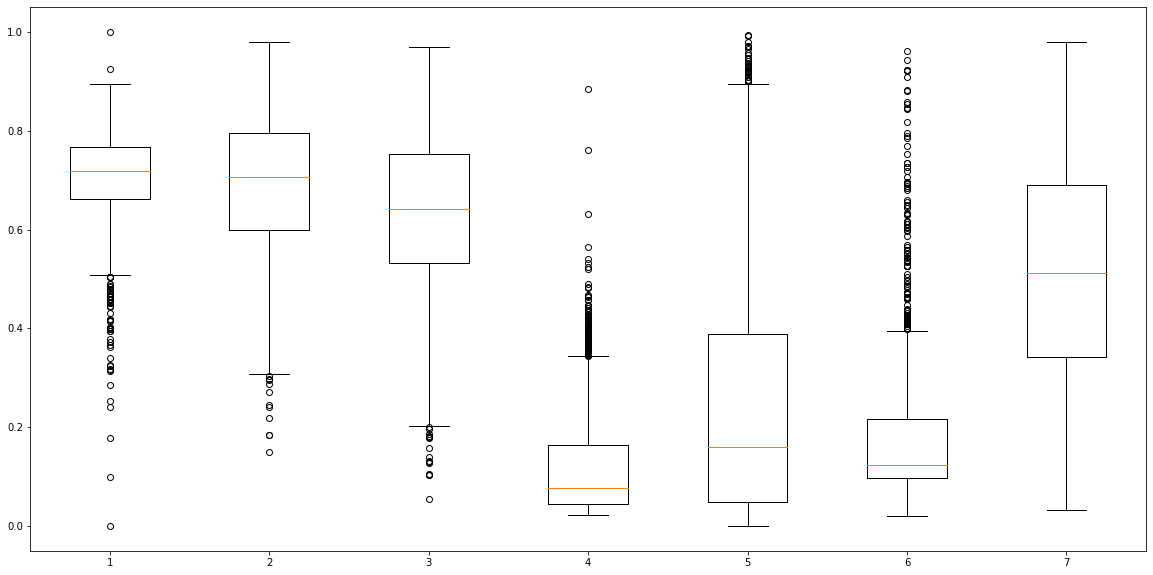

In [8]:
plt.figure(figsize=(20, 10))
plt.boxplot(df[['Normalized_loud', 'Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Liveness', 'Valence']].astype(float))
# By plotting the coloumns with values ranging [0, 1] together it makes it easier ti see skews in the data set

[ 2123734. 22698747.]
4883 83337783


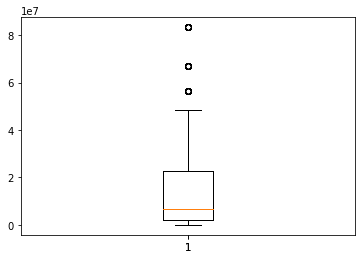

In [9]:
plt.boxplot(df['Artist Followers'].astype(int))
temp = df['Artist Followers'].astype(int)
plt.boxplot(temp)
quartiles = percentile(temp, [25, 75])
data_min, data_max = temp.min(), temp.max()
print(quartiles)
print(data_min, data_max)

# This is a very good set of data, the outliers would be the really famous artists

[65. 80.]
0 100


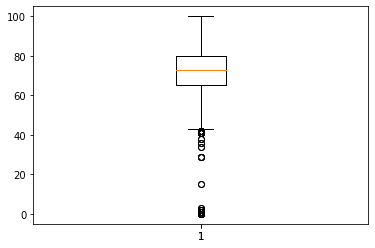

In [10]:
plt.boxplot(df['Popularity'].astype(int))
temp = df['Popularity'].astype(int)
plt.boxplot(temp)
quartiles = percentile(temp, [25, 75])
data_min, data_max = temp.min(), temp.max()
print(quartiles)
print(data_min, data_max)

# Since most of the values are in the higher numbers we can conclude that most of the songs are very popular
# is is more uncommon to find a unpopular song meaning this dataset is on the popular songs

Text(0, 0.5, 'Song Popularity')

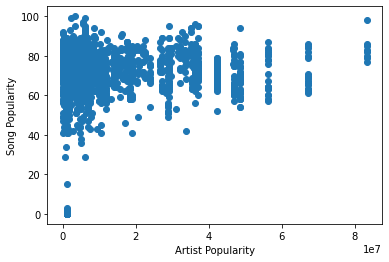

In [11]:
plt.scatter(df['Artist Followers'].astype(int), df['Popularity'].astype(int))
plt.xlabel('Artist Popularity')
plt.ylabel('Song Popularity')

# There is a slight trend in the relationship between Song popularity and Artist popularity.
# If the artist is popular it is more likely their song will be popular

Text(0, 0.5, 'Song Popularity')

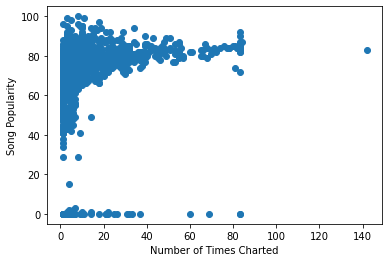

In [13]:
plt.scatter(df['Number of Times Charted'].astype(int), df['Popularity'].astype(int))
plt.xlabel('Number of Times Charted')
plt.ylabel('Song Popularity')

# There seems to be a slight positive correlation, however there are some
# songs who were charted multiple times, but not popular

In [14]:
df.to_csv('pop_input.csv')